In [1]:
import pandas as pd
import yfinance as yf
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
def get_data(symbol):
    data = yf.Ticker(symbol)
    data = data.history(period = 'max', interval = '1d')
    return data['Close']

In [3]:
symbol = 'es gc si pl pa hg cl ng zc zo ke zr zs gf he cc kc ct lbs sb'
symbol = [sym + '=F' for sym in str.upper(symbol).split()]
symbol

['ES=F',
 'GC=F',
 'SI=F',
 'PL=F',
 'PA=F',
 'HG=F',
 'CL=F',
 'NG=F',
 'ZC=F',
 'ZO=F',
 'KE=F',
 'ZR=F',
 'ZS=F',
 'GF=F',
 'HE=F',
 'CC=F',
 'KC=F',
 'CT=F',
 'LBS=F',
 'SB=F']

In [4]:
%%time

symbol_data = dict((x, get_data(x)) for x in symbol)
symbol_data

CPU times: user 3.78 s, sys: 650 ms, total: 4.43 s
Wall time: 1min 46s


{'ES=F': Date
 2000-09-18    1467.50
 2000-09-19    1478.50
 2000-09-20    1469.50
 2000-09-21    1469.50
 2000-09-22    1468.50
                ...   
 2021-07-16    4318.50
 2021-07-19    4251.25
 2021-07-20    4315.50
 2021-07-22    4359.50
 2021-07-23    4403.75
 Name: Close, Length: 5234, dtype: float64,
 'GC=F': Date
 2000-08-30     273.899994
 2000-08-31     278.299988
 2000-09-01     277.000000
 2000-09-05     275.799988
 2000-09-06     274.200012
                  ...     
 2021-07-16    1814.500000
 2021-07-19    1808.699951
 2021-07-20    1810.900024
 2021-07-22    1805.000000
 2021-07-23    1802.099976
 Name: Close, Length: 5169, dtype: float64,
 'SI=F': Date
 2000-08-30     4.930000
 2000-08-31     5.003000
 2000-09-01     5.004000
 2000-09-05     4.998000
 2000-09-06     4.983000
                 ...    
 2021-07-16    25.777000
 2021-07-19    25.125999
 2021-07-20    24.976999
 2021-07-22    25.365000
 2021-07-23    25.240000
 Name: Close, Length: 5161, dtype: float64,
 

In [5]:
data = [symbol_data[d] for d in symbol_data]
data = reduce(lambda left, right: pd.merge(left, right, on = ['Date'], how = 'inner'), data)
data.columns = ['S&P', 'Gold', 'Silver', 'Platinum', 'Palladium', 'Copper', 'Crude Oil', 'Nautral Gas', 'Corn', 'Oat', \
                'Wheat', 'Rice', 'Soybean', 'Cattle', 'Pork', 'Cocca', 'Coffee', 'Cotton', 'Lumber', 'Sugar']
data

,S&P,Gold,Silver,Platinum,Palladium,Copper,Crude Oil,Nautral Gas,Corn,Oat,Wheat,Rice,Soybean,Cattle,Pork,Cocca,Coffee,Cotton,Lumber,Sugar
Date,,,,,,,,,,,,,,,,,,,,
2002-03-26,1142.50,296.600006,4.579000,515.000000,392.200012,0.7415,25.430000,3.410,205.00,202.75,287.00,373.500,463.75,79.250000,52.900002,1470.0,55.049999,38.160000,299.899994,6.080000
2002-03-28,1144.75,302.600006,4.641000,515.700012,388.899994,0.7605,26.230000,3.245,207.00,199.00,290.00,372.000,473.50,78.750000,51.875000,1494.0,57.200001,38.160000,295.200012,5.930000
2002-04-01,1144.50,303.200012,4.691000,517.700012,390.649994,0.7610,26.860001,3.520,202.50,199.00,296.00,373.000,474.25,79.925003,51.049999,1504.0,58.500000,38.410000,295.700012,5.770000
2002-04-02,1138.50,305.899994,4.738000,534.000000,390.000000,0.7610,27.700001,3.630,204.25,203.75,296.50,370.500,476.00,79.074997,49.575001,1488.0,59.349998,38.630001,292.600006,5.830000
2002-04-05,1125.50,300.100006,4.571000,528.500000,362.000000,0.7210,26.219999,3.270,201.50,215.00,291.50,371.500,460.50,76.300003,45.974998,1559.0,55.000000,37.730000,299.500000,5.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-16,4318.50,1814.500000,25.777000,1107.000000,2635.500000,4.3325,71.809998,3.674,556.00,436.00,651.50,1323.000,1454.75,155.625000,105.650002,2320.0,161.199997,90.699997,536.400024,17.709999
2021-07-19,4251.25,1808.699951,25.125999,1069.300049,2590.899902,4.2105,66.419998,3.779,556.00,431.75,652.25,1304.000,1428.00,157.375000,104.474998,2239.0,155.250000,87.110001,552.099976,17.070000
2021-07-20,4315.50,1810.900024,24.976999,1064.300049,2638.600098,4.2735,67.419998,3.876,571.75,450.75,660.25,1319.000,1443.50,155.524994,105.000000,2257.0,165.649994,88.870003,542.000000,17.410000


In [6]:
cor = []

for col in data.columns:
    if col != 'S&P':
        temp = data[['S&P', col]]
        cor.append(temp.corr().loc[col, 'S&P'])
df1 = pd.DataFrame(data.columns[1:])
cor = pd.DataFrame(cor)
df = pd.concat([df1, cor], axis = 1)
df.columns = ['futures', 'correlations']
df['abs_correlations'] = df['correlations'].apply(abs)
df

,futures,correlations,abs_correlations
0,Gold,0.504489,0.504489
1,Silver,0.017580,0.017580
2,Platinum,-0.450486,0.450486
3,Palladium,0.892667,0.892667
4,Copper,0.145631,0.145631
5,Crude Oil,-0.343060,0.343060
6,Nautral Gas,-0.523187,0.523187
7,Corn,-0.084603,0.084603
8,Oat,0.157239,0.157239
9,Wheat,-0.245467,0.245467


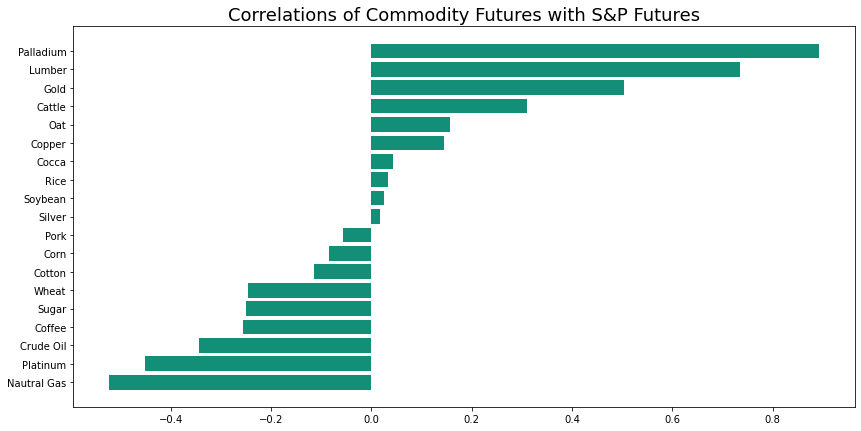

In [7]:
df = df.sort_values(by = 'correlations', ascending = False)

plt.figure(figsize = (14, 7))
plt.gca().invert_yaxis()
plt.barh(df['futures'], df['correlations'], color = '#148F77')
plt.title('Correlations of Commodity Futures with S&P Futures', fontsize = 18)
plt.savefig('cor_day.png')
plt.show()

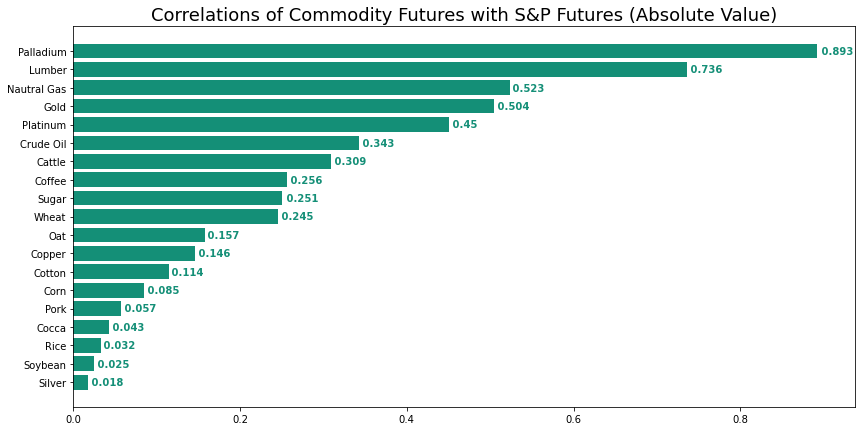

In [10]:
df = df.sort_values(by = 'abs_correlations', ascending = False)

plt.figure(figsize = (14, 7))
plt.gca().invert_yaxis()
plt.barh(df['futures'], df['abs_correlations'], color = '#148F77')
plt.title('Correlations of Commodity Futures with S&P Futures (Absolute Value)', fontsize = 18)
y = df['abs_correlations'].apply(lambda x: round(x, 3))
for i, v in enumerate(y):
    plt.text(v, i, " " + str(v), color = '#148F77', va = 'center', fontweight = 'bold') 
plt.savefig('cor_day_abs.png')
plt.show()